In [51]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
import numpy as np
import seaborn as sns


In [52]:
data = pd.read_csv("/content/dataPreprocessed.csv")
data.shape
data.drop_duplicates(inplace=True)

print("No of Unique Job Descriptions: ", data['Job_Description'].count())
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:", stopword)


No of Unique Job Descriptions:  5492
Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
class_df = data.groupby('label').count()
class_df.style.background_gradient(cmap='PiYG')


,X,Title,Company,Location,Type,Salary,Contract_type,Job_Description,JobType,Industry,experience,exp_normailzed,type_norm,Contract_type_norm,salary1,salary_min,salary_max,salary_avg,salary_norm,annual_pay
label,,,,,,,,,,,,,,,,,,,,
High,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,946,946,1478,1478,1478,1478,1478,1478,1478,1478
Low,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,802,802,1652,1652,1652,1652,1652,1652,1652,1652
Medium,2362,2362,2348,2362,2362,2362,2362,2362,2361,2361,1528,1528,2362,2362,2362,2362,2362,2362,2362,2362


In [54]:
def clean(job):
    job = job.lower()  # lower case
    job = re.sub(r'https?://\S+|www\.\S+', " ", job)  # URL
    # job = re.sub(r'@\w+', ' ', job)  # mentions
    # job = re.sub(r'#\w+', ' ', job)  # hashtags
    job = re.sub(r'[^\w\s]', ' ', job)  # punctuations
    # job = re.sub(r'\d+', ' ', job)  # digits
    job = re.sub('\[.*?\]', ' ', job)  # any punctuations left
    # any others charcters other than numbers and letters
    job = re.sub("[^a-z0-9]", " ", job)
    job = job.split()  # stopwords
    job = " ".join([word for word in job if not word in stopword])
    return job

In [55]:
data.head

<bound method NDFrame.head of          X                                              Title  \
0        1                        Construction Superintendent   
1        2                      Regional Construction Manager   
2        3                       Construction Project Manager   
3        5                               Construction Manager   
4        7            Project Manager - Construction (Hawaii)   
...    ...                                                ...   
5487  1206                                       TRAVEL AGENT   
5488  1207  LOTTERY-Accounts Payable Travel Specialist (Ac...   
5489  1208              Reservation Specialist/Beach Services   
5490  1213                                 Travel Coordinator   
5491  1215                             Reservation Specialist   

                                   Company              Location    Type  \
0        Curtis Construction Company, Inc.   Stoughton, MA 02072  Onsite   
1                   Chipotle Mexican 

In [56]:
data['Job_Description'] = data['Job_Description'].astype(
    str).apply(lambda x: clean(x))
data['Job_Description'].sample(5)

max_len = len(max(data['Job_Description'], key=len))
print("Maximum length of Job Decription:", max_len)

Maximum length of Job Decription: 24699


In [57]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()


def lemmatize_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + lemmatizer.lemmatize(w) + " "
    return temp


In [59]:
data['Job_Description'] = data['Job_Description'].apply(
    lambda x: lemmatize_jobs(x))

In [60]:
stemmer = PorterStemmer()

def stem_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + stemmer.stem(w) + " "
    return temp


data['Job_Description'] = data['Job_Description'].apply(lambda x: stem_jobs(x))

x = data['Job_Description']
y = data['label']

In [61]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

train_X.shape

(4393,)

In [62]:
test_Y.shape

(1099,)

In [63]:
# encoder = LabelEncoder()
# train_Y = encoder.fit_transform(train_Y)
# test_Y = encoder.fit_transform(test_Y)

LR TFIDF Accuracy Score ->  85.16833484986351
LR TFIDF F1 Score ->  0.8470140612944229
              precision    recall  f1-score   support

        High       0.90      0.74      0.81       296
         Low       0.84      0.90      0.87       330
      Medium       0.84      0.89      0.86       473

    accuracy                           0.85      1099
   macro avg       0.86      0.84      0.85      1099
weighted avg       0.85      0.85      0.85      1099



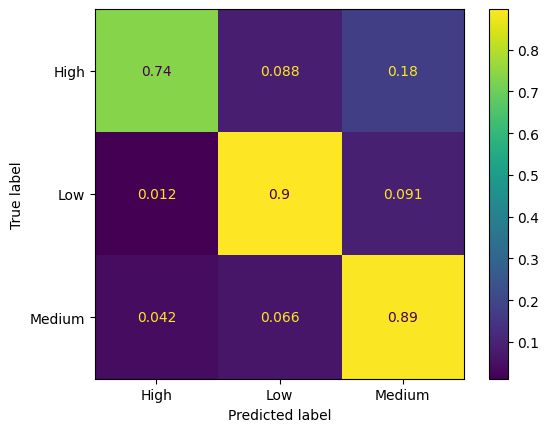

In [64]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)
lr1_pred = lr1.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr1_pred, test_Y)*100)
lr_cm = confusion_matrix(test_Y, lr1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr1_pred, average='macro'))
print(classification_report(test_Y, lr1_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr1.classes_)
disp.plot()
plt.show()


LR TFIDF Accuracy Score ->  88.26205641492265
LR TFIDF F1 Score ->  0.8807826792444026
              precision    recall  f1-score   support

        High       0.90      0.82      0.86       296
         Low       0.86      0.94      0.90       330
      Medium       0.89      0.88      0.89       473

    accuracy                           0.88      1099
   macro avg       0.88      0.88      0.88      1099
weighted avg       0.88      0.88      0.88      1099



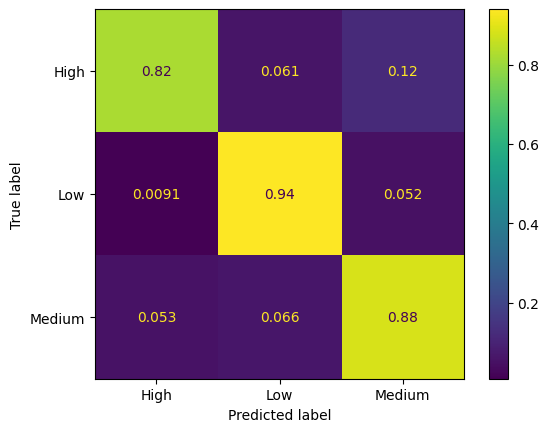

In [65]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)
lr1_pred = lr1.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr1_pred, test_Y)*100)
lr_cm = confusion_matrix(test_Y, lr1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr1_pred, average='macro'))
print(classification_report(test_Y, lr1_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr1.classes_)
disp.plot()
plt.show()

In [66]:
# vectorizer = TfidfVectorizer(ngram_range=(1, 3)).fit(train_X)
# train_X_tfidf = vectorizer.transform(train_X)
# test_X_tfidf = vectorizer.transform(test_X)
# lr = LogisticRegression(penalty="l2", multi_class="multinomial", solver="saga", C=1)
# lr.fit(train_X_tfidf, train_Y)
# lr_pred = lr.predict(test_X_tfidf)
# print("LR TFIDF Accuracy Score -> ", accuracy_score(lr_pred, test_Y)*100)

LR TFIDF Accuracy Score ->  85.53230209281165
LR TFIDF F1 Score ->  0.8504685229670926
              precision    recall  f1-score   support

        High       0.90      0.74      0.81       296
         Low       0.85      0.90      0.87       330
      Medium       0.84      0.90      0.87       473

    accuracy                           0.86      1099
   macro avg       0.86      0.84      0.85      1099
weighted avg       0.86      0.86      0.85      1099



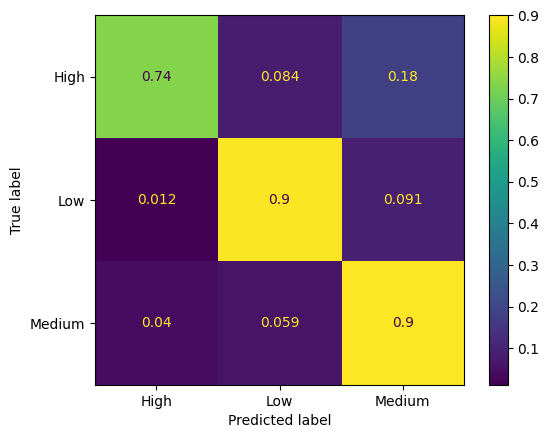

In [67]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr2 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr2.fit(train_X_tfidf,train_Y)
lr2_pred = lr2.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr2_pred, test_Y)*100)
lr2_cm = confusion_matrix(test_Y, lr2_pred, normalize="true")
# sns.heatmap(lr2_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr2_pred, average='macro'))
print(classification_report(test_Y, lr2_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=lr2_cm, display_labels=lr2.classes_)
disp.plot()
plt.show()

LR TFIDF Accuracy Score ->  87.89808917197452
LR TFIDF F1 Score ->  0.8762735909445878
              precision    recall  f1-score   support

        High       0.89      0.81      0.85       296
         Low       0.87      0.93      0.90       330
      Medium       0.88      0.89      0.89       473

    accuracy                           0.88      1099
   macro avg       0.88      0.88      0.88      1099
weighted avg       0.88      0.88      0.88      1099



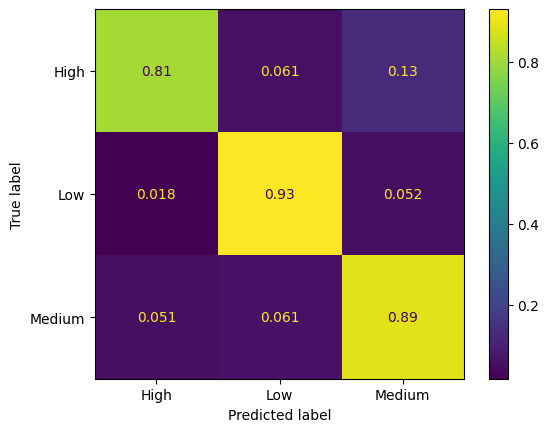

In [68]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)

lr2 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr2.fit(train_X_tfidf,train_Y)
lr2_pred = lr2.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ",accuracy_score(lr2_pred, test_Y)*100)
lr2_cm = confusion_matrix(test_Y, lr2_pred, normalize="true")
# sns.heatmap(lr2_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr2_pred, average='macro'))
print(classification_report(test_Y, lr2_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=lr2_cm, display_labels=lr2.classes_)
disp.plot()
plt.show()

In [69]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
svm = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')
svm.fit(train_X_tfidf,train_Y)
svm_pred = svm.predict(test_X_tfidf)
print("SVM Accuracy Score -> ",accuracy_score(svm_pred, test_Y)*100)

SVM Accuracy Score ->  87.98908098271156


SVM F1 Score ->  0.8778116869203254
              precision    recall  f1-score   support

        High       0.88      0.82      0.85       296
         Low       0.87      0.94      0.90       330
      Medium       0.89      0.88      0.88       473

    accuracy                           0.88      1099
   macro avg       0.88      0.88      0.88      1099
weighted avg       0.88      0.88      0.88      1099



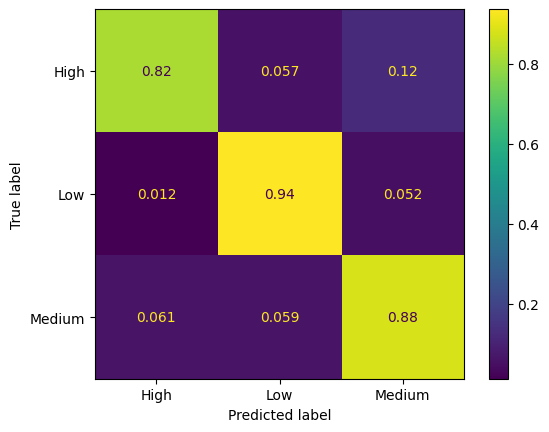

In [70]:
print("SVM F1 Score -> ", f1_score(test_Y, svm_pred, average='macro'))
print(classification_report(test_Y, svm_pred))
svm_cm = confusion_matrix(test_Y, svm_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_)
disp.plot()
plt.show()

SVM Accuracy Score ->  87.44313011828936
SVM F1 Score ->  0.8722321322485227
              precision    recall  f1-score   support

        High       0.86      0.82      0.84       296
         Low       0.87      0.93      0.90       330
      Medium       0.89      0.87      0.88       473

    accuracy                           0.87      1099
   macro avg       0.87      0.87      0.87      1099
weighted avg       0.87      0.87      0.87      1099



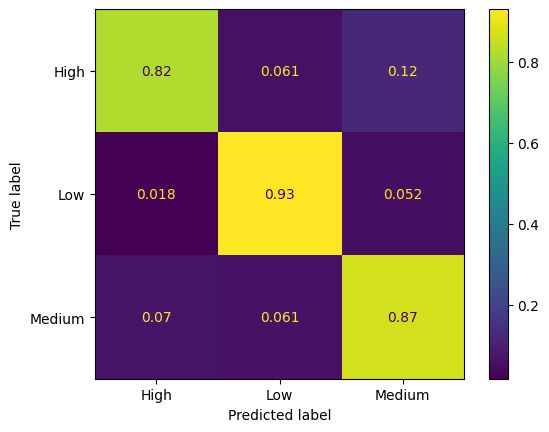

In [71]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
svm2 = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')
svm2.fit(train_X_tfidf,train_Y)
svm2_pred = svm2.predict(test_X_tfidf)
print("SVM Accuracy Score -> ",accuracy_score(svm2_pred, test_Y)*100)
print("SVM F1 Score -> ", f1_score(test_Y, svm2_pred, average='macro'))
print(classification_report(test_Y, svm2_pred))
cm = confusion_matrix(test_Y, svm2_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm2.classes_)
disp.plot()
plt.show()